In [453]:
import pandas as pd

# 주식형 펀드 파일 불러오기
fund_df = pd.read_excel('./excel/주식형펀드/미래에셋3억만들기솔로몬증권투자신탁1호(주식)_가격변동추이_20220728.xls')
fund_df.head(5)

,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,벤치마크지수,벤치마크지수.1,벤치마크지수.2,벤치마크지수.3,벤치마크지수.4
0,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,KOSPI,KOSPI200,KOSDAQ,국공채(3년만기),회사채(3년만기)
1,2022/07/01,983.32,-16.58,1014.15,83953,2305.42,304.02,729.48,3.439,4.691
2,2022/06/30,999.9,-18,1014.14,84373,2332.64,307.2,745.44,3.552,4.794
3,2022/06/29,1017.9,10.85,1011.44,84396,2377.99,312.66,762.35,3.552,4.793
4,2022/06/28,1007.05,15.74,1011.44,84403,2422.09,319.11,769.51,3.552,4.793


In [454]:
# 필요한 컬럼만 남긴다
# 기준일자, 기준가격, 전일대비\n등락, 벤치마크지수
fund_df = fund_df[["기준일자", "기준가격", "벤치마크지수"]]
fund_df.head()

,기준일자,기준가격,벤치마크지수
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [455]:
# 컬럼명 변경
fund_df.rename(columns={"벤치마크지수" : "KOSPI"}, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [456]:
# 불필요 행 제거
fund_df = fund_df.loc[1:]
fund_df.head()

,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09
5,2022/06/27,991.31,2401.92


In [457]:
# 기준일자 오름차순으로 변경
fund_df.sort_values("기준일자", ascending=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
765,2019/06/03,895.87,2067.85
764,2019/06/04,904.98,2066.97
763,2019/06/05,903.08,2069.11
762,2019/06/07,906.01,2072.33
761,2019/06/10,909.27,2099.49


In [458]:
# 인덱스 재설정
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,2019/06/03,895.87,2067.85
1,2019/06/04,904.98,2066.97
2,2019/06/05,903.08,2069.11
3,2019/06/07,906.01,2072.33
4,2019/06/10,909.27,2099.49


In [459]:
# 기준월 컬럼 생성
fund_df["기준일자"] = fund_df["기준일자"].str.replace("/", "")
fund_df["기준월"] = fund_df["기준일자"].astype(str).str[:6]
fund_df.head()

,기준일자,기준가격,KOSPI,기준월
0,20190603,895.87,2067.85,201906
1,20190604,904.98,2066.97,201906
2,20190605,903.08,2069.11,201906
3,20190607,906.01,2072.33,201906
4,20190610,909.27,2099.49,201906


In [460]:
# 일별수익률 컬럼 생성 및 계산
fund_df["일별수익률"] = fund_df["기준가격"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률
0,20190603,895.87,2067.85,201906,NaN
1,20190604,904.98,2066.97,201906,0.010169
2,20190605,903.08,2069.11,201906,-0.002099
3,20190607,906.01,2072.33,201906,0.003244
4,20190610,909.27,2099.49,201906,0.003598


In [461]:
# KOSPI 일별수익률 컬럼 생성 및 계산
fund_df["KOSPI 일별수익률"] = fund_df["KOSPI"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190603,895.87,2067.85,201906,NaN,NaN
1,20190604,904.98,2066.97,201906,0.010169,-0.000426
2,20190605,903.08,2069.11,201906,-0.002099,0.001035
3,20190607,906.01,2072.33,201906,0.003244,0.001556
4,20190610,909.27,2099.49,201906,0.003598,0.013106


In [462]:
# 결측치 제거
fund_df.dropna(inplace=True)
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190604,904.98,2066.97,201906,0.010169,-0.000426
1,20190605,903.08,2069.11,201906,-0.002099,0.001035
2,20190607,906.01,2072.33,201906,0.003244,0.001556
3,20190610,909.27,2099.49,201906,0.003598,0.013106
4,20190611,918.61,2111.82,201906,0.010272,0.005873


In [463]:
fund_df.tail()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
759,20220627,991.31,2401.92,202206,0.022180,0.014924
760,20220628,1007.05,2422.09,202206,0.015878,0.008397
761,20220629,1017.9,2377.99,202206,0.010774,-0.018207
762,20220630,999.9,2332.64,202206,-0.017683,-0.019071
763,20220701,983.32,2305.42,202207,-0.016582,-0.011669


In [464]:
fund_df[fund_df["기준일자"]=="20190701"]

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
18,20190701,927.48,2129.74,201907,-0.000496,-0.000413


In [465]:
# fund_df = fund_df[fund_df["일별수익률"]<0]
# fund_df

In [466]:
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190604,904.98,2066.97,201906,0.010169,-0.000426
1,20190605,903.08,2069.11,201906,-0.002099,0.001035
2,20190607,906.01,2072.33,201906,0.003244,0.001556
3,20190610,909.27,2099.49,201906,0.003598,0.013106
4,20190611,918.61,2111.82,201906,0.010272,0.005873


In [467]:
# 기준일자별 마지막 날짜
monthly_last_day = fund_df.groupby(["기준월"])["기준일자"].max()
monthly_last_day = pd.DataFrame(monthly_last_day)
monthly_last_day

,기준일자
기준월,
201906,20190628
201907,20190731
201908,20190830
201909,20190930
201910,20191031
201911,20191129
201912,20191231
202001,20200131
202002,20200228


In [468]:
fund_df.drop(["일별수익률", "KOSPI 일별수익률"], axis=1, inplace=True)

In [469]:
df = pd.merge(monthly_last_day, fund_df, how="left", on="기준일자")
df

,기준일자,기준가격,KOSPI,기준월
0,20190628,927.94,2130.62,201906
1,20190731,892.02,2030.05,201907
2,20190830,868.3,1967.79,201908
3,20190930,925.39,2063.05,201909
4,20191031,928.09,2083.48,201910
5,20191129,931.71,2089.8,201911
6,20191231,989.23,2197.67,201912
7,20200131,967.43,2131.08,202001
8,20200228,940.15,1987.01,202002
9,20200331,797.9,1754.64,202003


In [470]:
# 월별수익률 컬럼 생성
df["월별수익률"] = df["기준가격"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률
0,20190628,927.94,2130.62,201906,NaN
1,20190731,892.02,2030.05,201907,-0.038709
2,20190830,868.3,1967.79,201908,-0.026591
3,20190930,925.39,2063.05,201909,0.065749
4,20191031,928.09,2083.48,201910,0.002918


In [471]:
df = df[df["월별수익률"] < 0]
df.reset_index(drop=True, inplace=True)

In [472]:
# KOSPI 월별수익률 컬럼 생성
df["KOSPI 월별수익률"] = df["KOSPI"].pct_change()
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12128\453886520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["KOSPI 월별수익률"] = df["KOSPI"].pct_change()


,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률
0,20190731,892.02,2030.05,201907,-0.038709,NaN
1,20190830,868.3,1967.79,201908,-0.026591,-0.030669
2,20200131,967.43,2131.08,202001,-0.022037,0.082981
3,20200228,940.15,1987.01,202002,-0.028198,-0.067604
4,20200331,797.9,1754.64,202003,-0.151306,-0.116945


In [473]:
df = df[df["KOSPI 월별수익률"] < 0]
df.reset_index(drop=True, inplace=True)

In [474]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12128\23947812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률
0,20190830,868.3,1967.79,201908,-0.026591,-0.030669
1,20200228,940.15,1987.01,202002,-0.028198,-0.067604
2,20200331,797.9,1754.64,202003,-0.151306,-0.116945
3,20201030,1051.26,2267.15,202010,-0.013531,-0.026092
4,20210730,1320.46,3202.32,202107,-0.018829,-0.000499


In [475]:
# 월별수익률을 사용한 3년 수익률 표준편차
year3_std = df["월별수익률"].std(ddof=0)
df["3년 표준편차"] = year3_std
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률,3년 표준편차
0,20190830,868.3,1967.79,201908,-0.026591,-0.030669,0.049263
1,20200228,940.15,1987.01,202002,-0.028198,-0.067604,0.049263
2,20200331,797.9,1754.64,202003,-0.151306,-0.116945,0.049263
3,20201030,1051.26,2267.15,202010,-0.013531,-0.026092,0.049263
4,20210730,1320.46,3202.32,202107,-0.018829,-0.000499,0.049263


In [476]:
# KOSPI 월별수익률을 사용한 KOSPI 3년 수익률 표준편차
kospi_year3_std = df["KOSPI 월별수익률"].std(ddof=0)
df["KOSPI 3년 표준편차"] = kospi_year3_std
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률,3년 표준편차,KOSPI 3년 표준편차
0,20190830,868.3,1967.79,201908,-0.026591,-0.030669,0.049263,0.040512
1,20200228,940.15,1987.01,202002,-0.028198,-0.067604,0.049263,0.040512
2,20200331,797.9,1754.64,202003,-0.151306,-0.116945,0.049263,0.040512
3,20201030,1051.26,2267.15,202010,-0.013531,-0.026092,0.049263,0.040512
4,20210730,1320.46,3202.32,202107,-0.018829,-0.000499,0.049263,0.040512


In [477]:
df = df[["기준일자", "기준가격", "KOSPI", "기준월", "월별수익률", "3년 표준편차", "KOSPI 월별수익률", "KOSPI 3년 표준편차"]]
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,3년 표준편차,KOSPI 월별수익률,KOSPI 3년 표준편차
0,20190830,868.3,1967.79,201908,-0.026591,0.049263,-0.030669,0.040512
1,20200228,940.15,1987.01,202002,-0.028198,0.049263,-0.067604,0.040512
2,20200331,797.9,1754.64,202003,-0.151306,0.049263,-0.116945,0.040512
3,20201030,1051.26,2267.15,202010,-0.013531,0.049263,-0.026092,0.040512
4,20210730,1320.46,3202.32,202107,-0.018829,0.049263,-0.000499,0.040512


#### CD금리 전처리

In [478]:
import pandas as pd

# 월별 CD금리 파일 불러오기
cd_df = pd.read_csv('./csv/월별_CD금리.csv')
cd_df.head()

,변환,원자료
0,2019/07,1.68
1,2019/08,1.49
2,2019/09,1.54
3,2019/10,1.46
4,2019/11,1.52


In [479]:
# df 복사
fund_cd_df = df.copy()

In [480]:
# CD금리 컬럼 추가
fund_cd_df["CD금리"] = cd_df["원자료"]
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,3년 표준편차,KOSPI 월별수익률,KOSPI 3년 표준편차,CD금리
0,20190830,868.3,1967.79,201908,-0.026591,0.049263,-0.030669,0.040512,1.68
1,20200228,940.15,1987.01,202002,-0.028198,0.049263,-0.067604,0.040512,1.49
2,20200331,797.9,1754.64,202003,-0.151306,0.049263,-0.116945,0.040512,1.54
3,20201030,1051.26,2267.15,202010,-0.013531,0.049263,-0.026092,0.040512,1.46
4,20210730,1320.46,3202.32,202107,-0.018829,0.049263,-0.000499,0.040512,1.52


In [481]:
fund_cd_df["CD금리"] = fund_cd_df["CD금리"].mean()

In [482]:
fund_cd_df["CD금리"] = fund_cd_df["CD금리"]/100

In [483]:
fund_cd_df.dropna(inplace=True)
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,3년 표준편차,KOSPI 월별수익률,KOSPI 3년 표준편차,CD금리
0,20190830,868.3,1967.79,201908,-0.026591,0.049263,-0.030669,0.040512,0.013542
1,20200228,940.15,1987.01,202002,-0.028198,0.049263,-0.067604,0.040512,0.013542
2,20200331,797.9,1754.64,202003,-0.151306,0.049263,-0.116945,0.040512,0.013542
3,20201030,1051.26,2267.15,202010,-0.013531,0.049263,-0.026092,0.040512,0.013542
4,20210730,1320.46,3202.32,202107,-0.018829,0.049263,-0.000499,0.040512,0.013542


### 정규성 검정

In [484]:
from scipy.stats import shapiro
import numpy as np

shapiro(fund_cd_df["월별수익률"])

ShapiroResult(statistic=0.7330994606018066, pvalue=0.0017901731189340353)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월별수익률', ylabel='Density'>

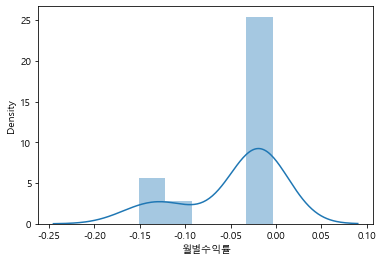

In [485]:
# 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

sns.distplot(fund_cd_df["월별수익률"])

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([-0.15130564, -0.13122372, -0.10554706, -0.03213274, -0.02819842,
         -0.02659133, -0.02118577, -0.01882895, -0.01658166, -0.01353127,
         -0.01016321, -0.0037636 ])),
 (0.04769157263401477, -0.04658778114832102, 0.8593765703347652))

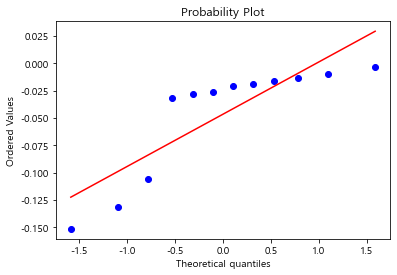

In [486]:
# Q-Q plot
import scipy.stats as stats

stats.probplot(fund_cd_df["월별수익률"], plot=plt)

In [487]:
3년 수익률 → 2019.7.1 펀드종가, 2022.6.31 펀드 종가

3년 CD 금리 → 3년 CD의 평균

3년 표준편차 → [”월별수익률”<0].std(ddof=0)

SyntaxError: invalid decimal literal (2564658185.py, line 1)

In [ ]:
# 초과수익률 계산
excess_return = ((fund_cd_df["기준가격"].iloc[-1]-fund_cd_df["기준가격"].iloc[0])/fund_cd_df["기준가격"].iloc[0])-fund_cd_df["CD금리"]
kospi_excess_return = ((fund_cd_df["KOSPI"].iloc[-1]-fund_cd_df["KOSPI"].iloc[0])/fund_cd_df["KOSPI"].iloc[0])-fund_cd_df["CD금리"]
return_std = fund_cd_df["3년 표준편차"]
kospi_return_std = fund_cd_df["KOSPI 3년 표준편차"]

In [ ]:
sortino_df = pd.DataFrame()
sortino_df["기준월"] = fund_cd_df["기준월"]
sortino_df["종가"] = fund_cd_df["기준가격"]
sortino_df["KOSPI 종가"] = fund_cd_df["KOSPI"]
sortino_df["초과수익률"] = excess_return
sortino_df["3년 표준편차"] = return_std
sortino_df["KOSPI 초과수익률"] = kospi_excess_return
sortino_df["KOSPI 3년 표준편차"] = kospi_return_std
sortino_df.head()

,기준월,종가,KOSPI 종가,초과수익률,3년 표준편차,KOSPI 초과수익률,KOSPI 3년 표준편차
0,201908,868.3,1967.79,0.118924,0.049263,0.158037,0.040512
1,202002,940.15,1987.01,0.118924,0.049263,0.158037,0.040512
2,202003,797.9,1754.64,0.118924,0.049263,0.158037,0.040512
3,202010,1051.26,2267.15,0.118924,0.049263,0.158037,0.040512
4,202107,1320.46,3202.32,0.118924,0.049263,0.158037,0.040512


In [ ]:
sortino_df["소르티노지수"] = ""
sortino_df["소르티노지수"] = sortino_df["초과수익률"]/sortino_df["3년 표준편차"]

In [ ]:
sortino_df["KOSPI 소르티노지수"] = ""
sortino_df["KOSPI 소르티노지수"] = sortino_df["KOSPI 초과수익률"]/sortino_df["KOSPI 3년 표준편차"]

In [ ]:
sortino_df["CD금리"] = fund_cd_df["CD금리"]

In [ ]:
# sortino_df.set_index(["기준월"], inplace=True)

In [ ]:
sortino_df

,기준월,종가,KOSPI 종가,초과수익률,3년 표준편차,KOSPI 초과수익률,KOSPI 3년 표준편차,소르티노지수,KOSPI 소르티노지수,CD금리
0,201908,868.3,1967.79,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
1,202002,940.15,1987.01,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
2,202003,797.9,1754.64,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
3,202010,1051.26,2267.15,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
4,202107,1320.46,3202.32,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
5,202108,1278.03,3199.27,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
6,202109,1273.22,3068.82,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
7,202110,1260.28,2970.68,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
8,202111,1233.58,2839.01,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
9,202201,1099.28,2663.34,0.118924,0.049263,0.158037,0.040512,2.414077,3.900989,0.013542
